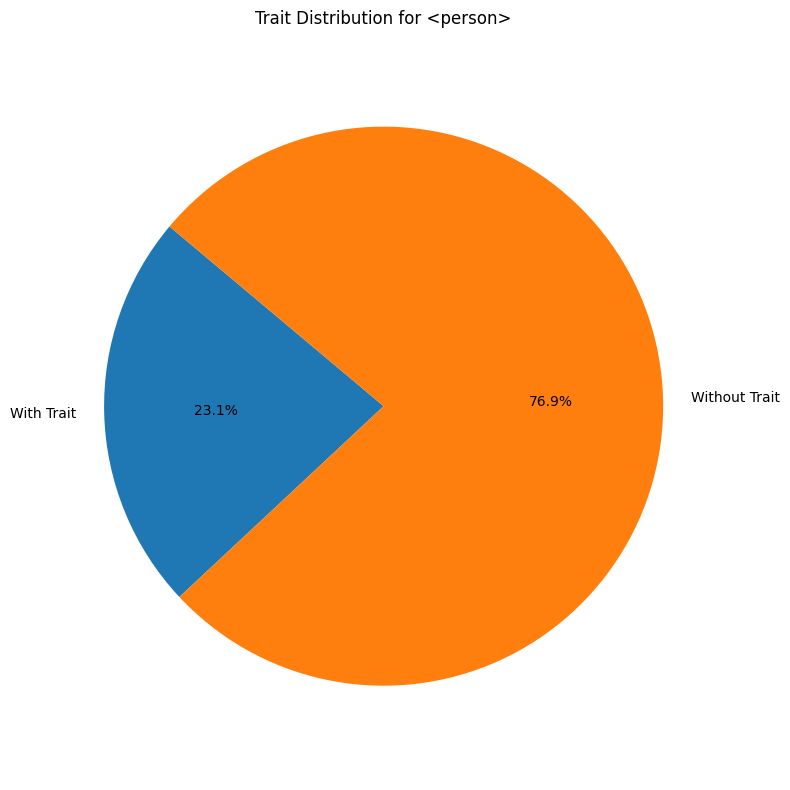

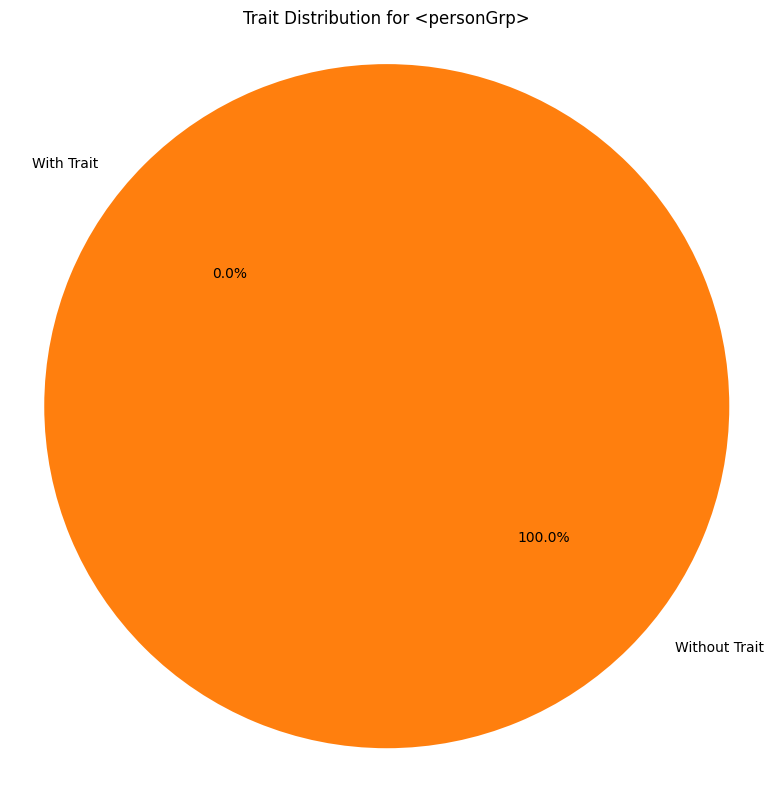

In [4]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# Define function to parse XML files
def parse_xml(file_path):
    namespaces = {'tei': 'http://www.tei-c.org/ns/1.0'}
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # Initialize counters
    person_with_trait = 0
    person_without_trait = 0
    person_grp_with_trait = 0
    person_grp_without_trait = 0
    
    # Find all <listPerson> elements
    list_persons = root.findall('.//tei:listPerson', namespaces=namespaces)
    
    # Iterate over <listPerson> elements
    for list_person in list_persons:
        # Find all <person> elements within <listPerson>
        persons = list_person.findall('.//tei:person', namespaces=namespaces)
        
        # Iterate over <person> elements
        for person in persons:
            # Check if <person> has <trait> as a child
            trait = person.find('tei:trait', namespaces=namespaces)
            if trait is not None:
                person_with_trait += 1
            else:
                person_without_trait += 1
        
        # Find all <personGrp> elements within <listPerson>
        person_grps = list_person.findall('.//tei:personGrp', namespaces=namespaces)
        
        # Iterate over <personGrp> elements
        for person_grp in person_grps:
            # Check if <personGrp> has <trait> as a child
            trait = person_grp.find('tei:trait', namespaces=namespaces)
            if trait is not None:
                person_grp_with_trait += 1
            else:
                person_grp_without_trait += 1
    
    return person_with_trait, person_without_trait, person_grp_with_trait, person_grp_without_trait

# Initialize counters for total
total_person = 0
total_person_grp = 0

# Initialize counters for traits
total_person_with_trait = 0
total_person_without_trait = 0
total_person_grp_with_trait = 0
total_person_grp_without_trait = 0

# Iterate over each file in the "results" folder
results_folder = "results"
for filename in os.listdir(results_folder):
    if filename.endswith(".xml"):
        file_path = os.path.join(results_folder, filename)
        person_with_trait, person_without_trait, person_grp_with_trait, person_grp_without_trait = parse_xml(file_path)
        
        # Increment total counts
        total_person += person_with_trait + person_without_trait
        total_person_grp += person_grp_with_trait + person_grp_without_trait
        
        # Increment counts with and without trait
        total_person_with_trait += person_with_trait
        total_person_without_trait += person_without_trait
        total_person_grp_with_trait += person_grp_with_trait
        total_person_grp_without_trait += person_grp_without_trait

# Create DataFrame for <person>
data_person = {
    'Category': ['With Trait', 'Without Trait'],
    'Count': [total_person_with_trait, total_person_without_trait]
}
df_person = pd.DataFrame(data_person)

# Create DataFrame for <personGrp>
data_person_grp = {
    'Category': ['With Trait', 'Without Trait'],
    'Count': [total_person_grp_with_trait, total_person_grp_without_trait]
}
df_person_grp = pd.DataFrame(data_person_grp)

# Plot pie chart for <person>
plt.figure(figsize=(8, 8))
plt.pie(df_person['Count'], labels=df_person['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Trait Distribution for <person>')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save plot as PNG for <person>
img_folder = "output/img"
os.makedirs(img_folder, exist_ok=True)
plt.savefig(os.path.join(img_folder, "trait_distribution_person.png"))

# Show plot for <person>
plt.show()

# Plot pie chart for <personGrp>
plt.figure(figsize=(8, 8))
plt.pie(df_person_grp['Count'], labels=df_person_grp['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Trait Distribution for <personGrp>')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Save plot as PNG for <personGrp>
plt.savefig(os.path.join(img_folder, "trait_distribution_personGrp.png"))

# Show plot for <personGrp>
plt.show()
